In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [2]:
# 源数据处理
all_file = os.listdir('./face/rawdata')
# 读取所有data_x数据,  有问题的数据：第1186个，2412号；第1190个，2416号 ；2021号
data_x = np.zeros((len(all_file),128,128))
data_y = np.zeros(len(all_file))

# 将两个数据标签整理再一起
f = open('./face/faceDR','r')
r1 = f.readlines()
f.close()

f = open('./face/faceDS','r')
r2 = f.readlines()
f.close()
for i in r2:
    r1.append(i)

# 整理出data_x,和data_y
all_file = os.listdir('./face/rawdata')
for i in range(len(all_file)):
    with open('./face/rawdata/'+all_file[i],'rb') as f:
        x = np.fromfile(f,dtype=np.ubyte)
        x = x.reshape(128,-1)
        data_x[i] = x
        for j in r1:
            if all_file[i] in j:
                if 'female' in j:
                    data_y[i] = 0
                elif 'male' in j:
                    data_y[i] = 1
                else:
                    data_y[i] = None
                break
face_data=data_x.reshape(data_x.shape[0],-1)
face_target = data_y
# print(face_data.shape)

In [4]:
face_target.shape

(3983,)

In [3]:
X_train,X_test,Y_train,Y_test = train_test_split(face_data,face_target,shuffle = True,random_state=1,test_size = 0.3)

In [13]:
import time
t1 = time.time()
nn = MLPClassifier(hidden_layer_sizes = (1000,100,10,))
nn = nn.fit(X_train,Y_train)
score = nn.score(X_test,Y_test)
t2 = time.time()-t1

d:\Study softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:749: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(y > threshold, dtype=np.int)


In [14]:
print('每层网络层系数矩阵维度：\n',[coef.shape for coef in nn.coefs_])
print("运行时间：{:.4f}".format(t2))
print("准确率：",score)


每层网络层系数矩阵维度：
 [(16384, 1000), (1000, 100), (100, 10), (10, 1)]
运行时间：1060.7375
准确率： 0.8050209205020921


In [16]:
# 降维
from sklearn.decomposition import PCA

In [17]:
pca = PCA(178).fit(face_data)
face_data_n = pca.transform(face_data)


In [46]:
# 降维后，对数据进行标准化
from sklearn.preprocessing import StandardScaler
X_S = StandardScaler().fit_transform(face_data_n)

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X_S,face_target,shuffle = True,random_state=1,test_size = 0.3)

In [49]:
X_train.max()

12.43395066327604

In [67]:
t1 = time.time()
nn = MLPClassifier(hidden_layer_sizes = (100,20,5,),max_iter=400)
nn = nn.fit(X_train,Y_train)
score = nn.score(X_test,Y_test)
t2 = time.time()-t1


d:\Study softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:749: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(y > threshold, dtype=np.int)


In [75]:
y_pred = nn.predict_proba(X_test)


In [94]:
print(y_pred[:,1].shape)

(1195,)


In [56]:
print('The coefficient matrix dimension of each network layer:\n',[coef.shape for coef in nn.coefs_])
print("run time:{:.4f} s".format(t2))
print("accuracy:{:.4f}%".format(score*100))


The coefficient matrix dimension of each network layer:
 [(178, 100), (100, 20), (20, 5), (5, 1)]
run time:2.8304 s
accuracy:84.0167%


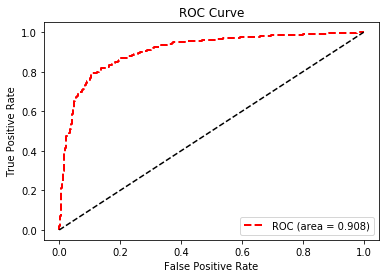

AUC: 0.9078414710429723


In [101]:
# 画ROC曲线和计算AUC值
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
 
y_label = Y_test  # 非二进制需要pos_label
y_pre = y_pred[:,1]
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)
 
# for i, value in enumerate(thersholds):
#     print("%f %f %f" % (fpr[i], tpr[i], value))
 
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'r--', label='ROC (area = {0:.3f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC:",roc_auc)


#### 交叉验证

In [52]:
#交叉验证
from sklearn.model_selection import cross_val_score
nn = nn = MLPClassifier(hidden_layer_sizes = (100,20,5,),max_iter=400)
score_list = cross_val_score(nn, X_S, face_target, cv=10)

d:\Study softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
d:\Study softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish t

In [59]:
print("10 fold cross validation results:\n",score_list)
print("Average accuracy:{:.4f} %".format(score_list.mean()*100))

10 fold cross validation results:
 [0.51879699 0.76441103 0.77944862 0.85964912 0.76942356 0.82706767
 0.80904523 0.85138539 0.59445844 0.82871537]
Average accuracy:76.0240 %


In [60]:
# 10次10折交叉验证
cross_val_score_list=[]
for i in range(10):
    score_list = cross_val_score(nn, X_S, face_target, cv=10)
    cross_val_score_list.append(score_list.mean())


d:\Study softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
d:\Study softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish t

Accuracy of 10 times 10 fold cross verification: [0.7570060138891969, 0.7554921409824321, 0.7697923482300424, 0.7532251574977467, 0.7627603082361295, 0.7539593607640989, 0.7562370842996762, 0.76101099488719, 0.7620071754516349, 0.7662861332285945]


d:\Study softwares\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:749: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(y > threshold, dtype=np.int)


AttributeError: 'list' object has no attribute 'mean'

In [65]:

print("Accuracy of 10 times 10 fold cross verification:\n",cross_val_score_list)
print("Average accuracy of 10 times cross validation:{:.4f} %".format(sum(cross_val_score_list)/10))

Accuracy of 10 times 10 fold cross verification:
 [0.7570060138891969, 0.7554921409824321, 0.7697923482300424, 0.7532251574977467, 0.7627603082361295, 0.7539593607640989, 0.7562370842996762, 0.76101099488719, 0.7620071754516349, 0.7662861332285945]
Average accuracy of 10 times cross validation:0.7598 %


In [61]:
sum(cross_val_score_list)/10

0.7597776717466742